In [1]:
from scipy import sparse

train = sparse.load_npz("16_dimentional.npz")
train

<14590x16 sparse matrix of type '<class 'numpy.float32'>'
	with 233440 stored elements in Compressed Sparse Row format>

In [2]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [3]:
X = train.toarray()
X

array([[-0.83611953,  0.63834023, -1.263843  , ...,  0.4624263 ,
        -1.1272795 ,  0.65833753],
       [ 0.03990146, -0.1465265 , -0.13144349, ..., -0.5132872 ,
        -0.6960972 , -0.06846964],
       [-0.5255524 ,  3.4109485 , -0.5019701 , ...,  0.56271714,
        -0.20457593,  3.88944   ],
       ...,
       [ 0.3670289 ,  0.00516137,  0.4595849 , ..., -0.83708227,
        -2.4453166 ,  0.5748102 ],
       [-1.6392529 , -1.1741219 ,  0.17414485, ...,  0.72636664,
        -1.5063672 ,  1.2880986 ],
       [ 0.01001012,  1.0181302 , -1.0916322 , ..., -0.26747414,
        -0.09424866,  1.382427  ]], dtype=float32)

In [4]:
import matplotlib.pyplot as plt

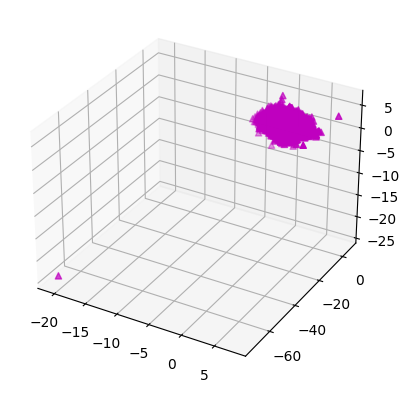

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='^', c="m")
plt.show()

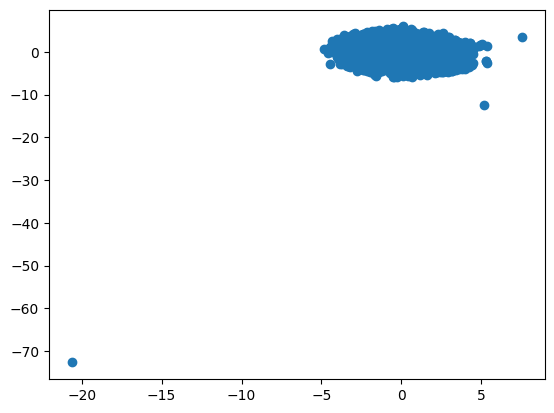

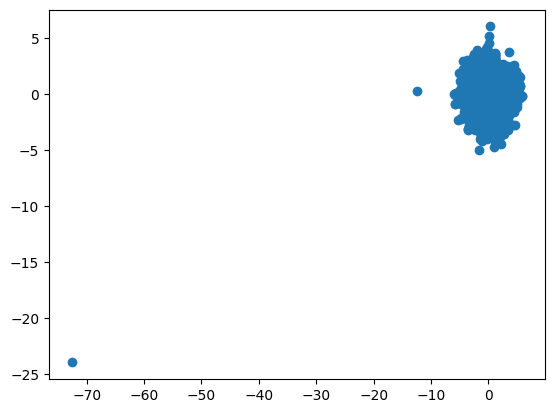

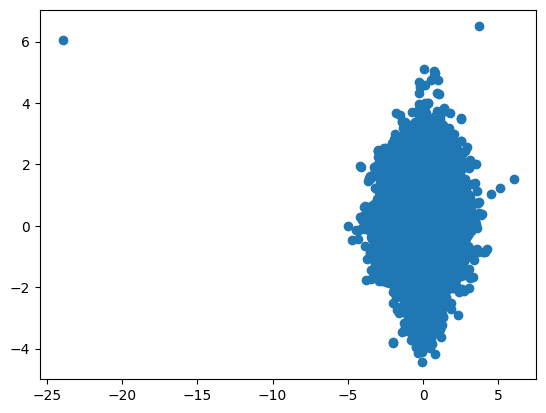

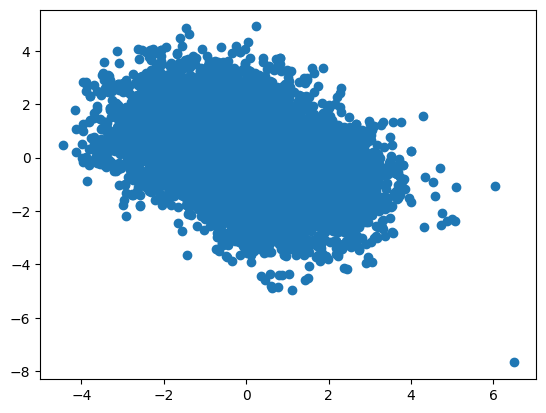

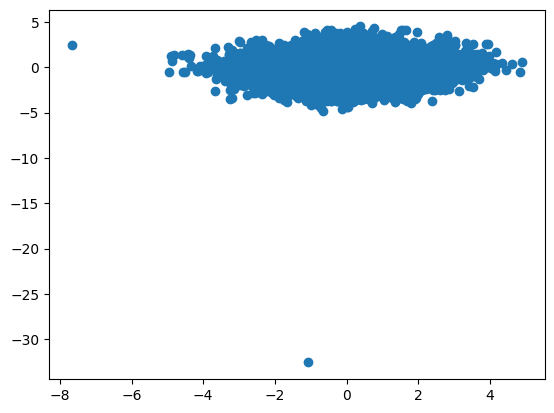

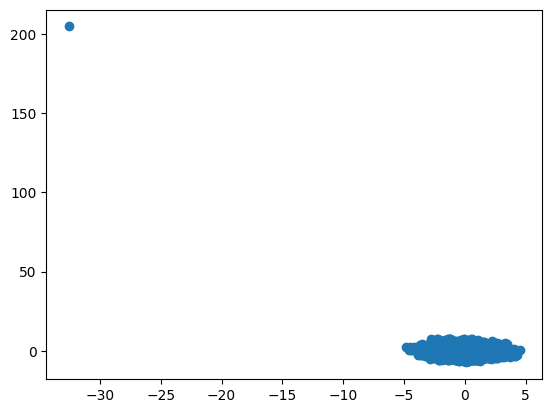

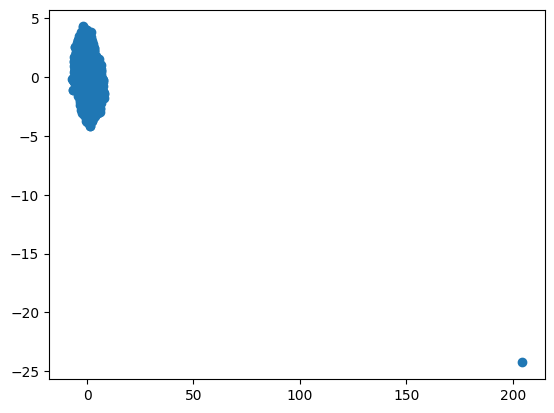

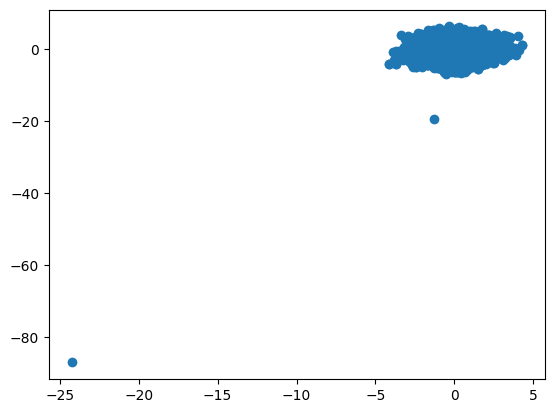

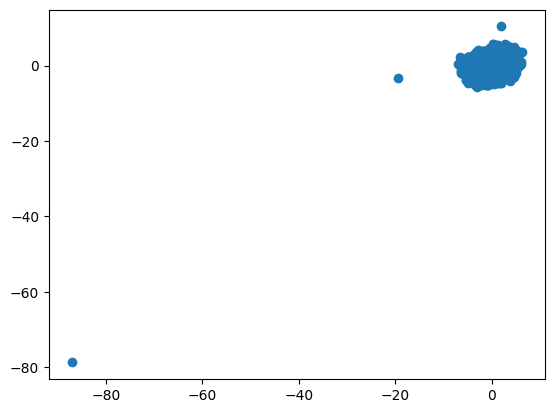

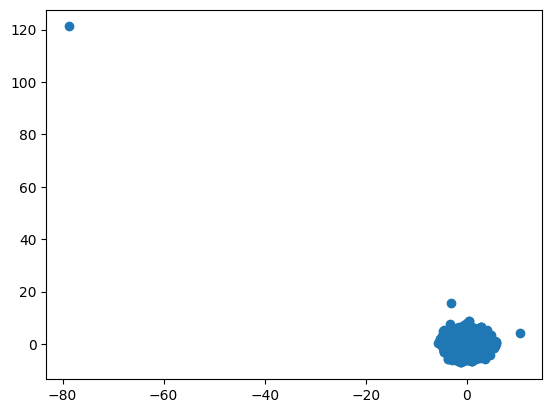

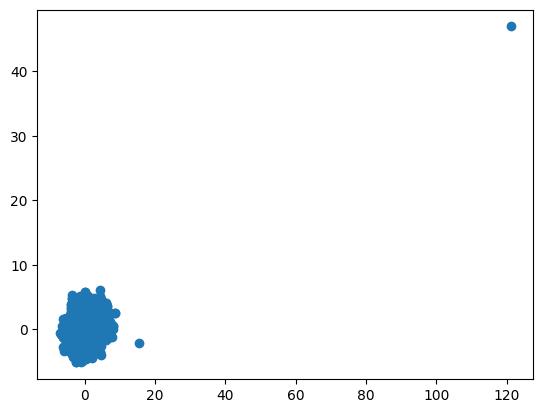

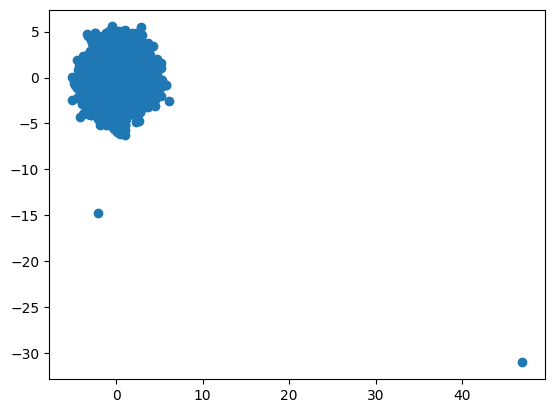

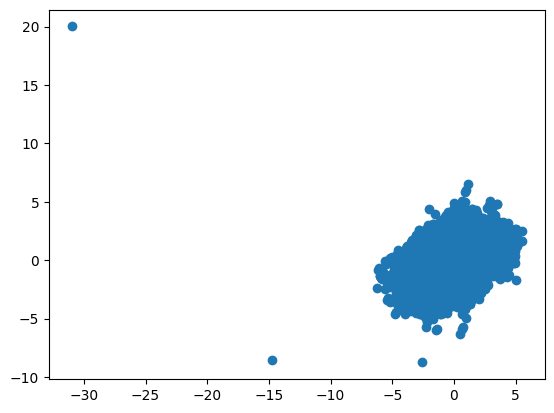

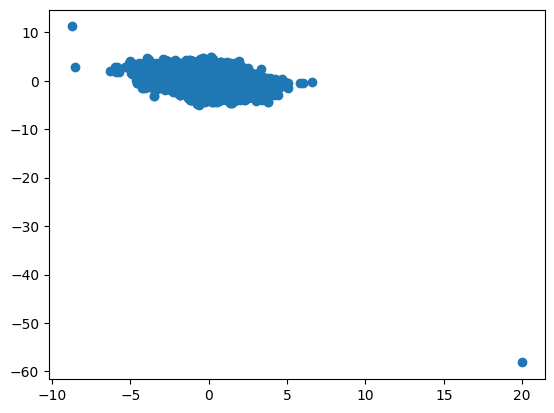

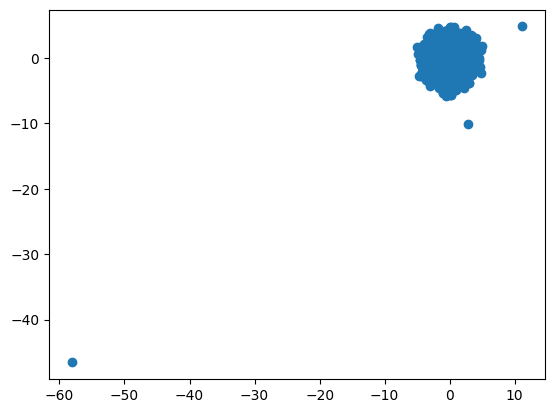

In [20]:
# num_rows = 5
# num_cols = 3
# fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i in range(15):
    plt.scatter(X[:, i], X[:, i+1])
    plt.show()



In [ ]:
for i in range(15):
    plt.scatter(X[:, i], X[:, i+1])

In [ ]:
fig, ((ax1, ax2, ax3, ax4), 
      (ax5, ax6, ax7, ax8),
      (ax9, ax10, ax11, ax12),
      (ax13, ax14, ax15, ax16),) = plt.subplots(4, 4)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

In [26]:
agg_clustering = AgglomerativeClustering(n_clusters=16)

In [27]:
cluster_labels = agg_clustering.fit_predict(X)

In [28]:
df_describe = pd.DataFrame(cluster_labels)
df_describe.describe()

,0
count,14590.000000
mean,6.306169
std,4.043930
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,15.000000


In [29]:
submission = np.arange(len(cluster_labels)).reshape(-1, 1)
submission = np.concatenate((submission, cluster_labels.reshape(-1, 1)), axis=1)

In [30]:
np.savetxt("submission_agglomerative_16d_16.csv", submission, delimiter=",", header="ID,TARGET", comments="", fmt='%d')


In [31]:
from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(n_clusters=42, random_state=42)

In [38]:
kmeans.fit(X)

KMeans(n_clusters=42, random_state=42)

In [39]:
cluster_labels = kmeans.labels_
cluster_labels

array([19,  6,  5, ..., 19, 23,  9], dtype=int32)

In [40]:
submission = np.arange(len(cluster_labels)).reshape(-1, 1)
submission = np.concatenate((submission, cluster_labels.reshape(-1, 1)), axis=1)

In [41]:
np.savetxt("kmeans_16d_42.csv", submission, delimiter=",", header="ID,TARGET", comments="", fmt='%d')